In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.onnx

from networks.relay_net import ReLayNet
#from networks.data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Image

In [23]:
import os
cwd = os.getcwd()

file = '/datasets/con_H1_N01848_LV_1_194.tif'
# file = '/datasets/con_H1_N01848_LA_1_272.tif'
# file = '/datasets/con_H1_N01848_LA_1_272_denoised.png'

directory = cwd + file

# Seeing whether file exists
image = plt.imread(directory)

In [24]:
# plt.imshow(image,cmap = "gray")

In [25]:
# print(image.shape)

### Read in Model

In [18]:
## My adapted code
from torch.utils.serialization import load_lua
model = cwd + '/models/relaynet_good.model'

# load the model
relaynet_model = torch.load(model).cuda()
test_data = image
test_data.shape

FileNotFoundError: [Errno 2] No such file or directory: '/home/sim/notebooks/relaynet_pytorch/models/relaynet_good.model'

In [26]:
# Printing the test data and the weights for the layers out
# relaynet_model # architecture of the net
# relaynet_model.eval()

In [27]:
# list(relaynet_model.encode1.parameters()) # weights on certain layers

In [28]:
# Printing model weights
# w = list(relaynet_model.parameters())
# w
# for param in relaynet_model.parameters():
#   print(param.data)
# list(relaynet_model.parameters()) # all weights

In [29]:
# print(torch.__version__)
# torch.cuda.FloatTensor(10)

### Data types

##### Testing data Dimensions

In [30]:
# X = np.zeros((512,600)) # create numpy array of size 512 x 600
# data = np.array([[11, 22, 33, 44, 55],[2,3,4,5,6],[10,20,30,40,50]])
# print(data[:,0])
# print(type(test_data))
# print(test_data.shape)
# print(test_data.dtype)
# new_test_data = np.zeros((512,600))

##### Data input

In [31]:
# Dummy Input
# Input is organised [No., Channel, Width, Height] - [1,1,64,512]
# Float tensor because weights are float Tensors
# dummy_input = Variable(torch.cuda.FloatTensor(1,1,600,512)) # has to be (1,1,...) because the first is no. therefore can't plot 2d image on same plot.
# print(dummy_input)
# out = relaynet_model(dummy_input)
# new_test = np.transpose(new_test, (0, 1, 3, 2)) # Transposing - not necessary as just changes rotation of image

In [32]:
# Reshape Data - not being used currently
# x has to be multiples of 8 because Sizes of tensors must match except in dimension 1.
x = 128
y = 512

seg_test_data = test_data[:y,:x] # taking the 512 x 64
seg_test_data.shape = (1,1,y,x)

out_seg = relaynet_model(Variable(torch.cuda.FloatTensor(seg_test_data)))

In [33]:
# Adding dimensions to original data to see if it works

new_test = np.copy(test_data) # copy so that it doesn't change init dimensions of test_data
new_test.shape = (1,1,512,600)

out_whole = relaynet_model(Variable(torch.cuda.FloatTensor(new_test)))

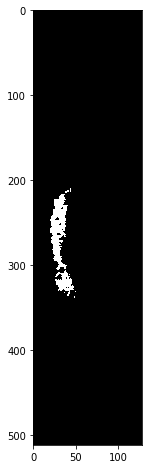

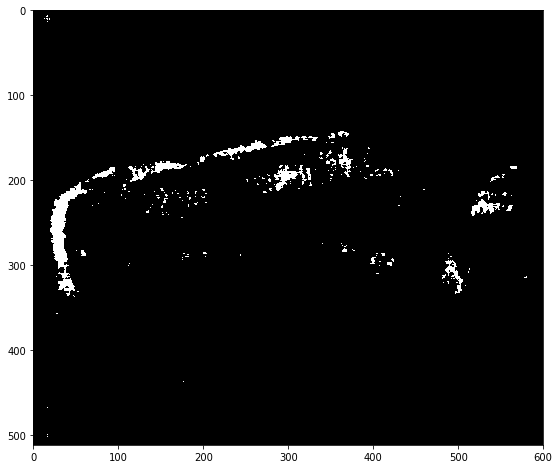

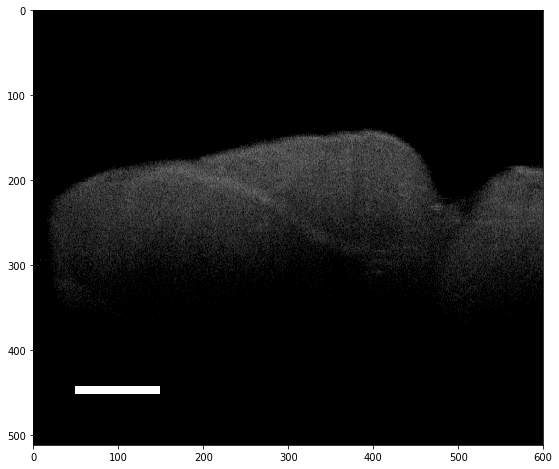

In [34]:
import matplotlib.pyplot as plt

max_val_seg, idx_seg = torch.max(out_seg,1) # torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)

idx_seg = idx_seg.data.cpu().numpy()
idx_seg = np.squeeze(idx_seg==2) # squeeze here to plot correctly
plt.imshow(idx_seg)
plt.show()

max_val_whole, idx_whole = torch.max(out_whole,1) # torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)

idx_whole = idx_whole.data.cpu().numpy()
idx_whole = np.squeeze(idx_whole==2) # squeeze here to plot correctly
plt.imshow(idx_whole)
plt.show()

# img_test = np.transpose(test_data, (1,0)) # not necessary to transpose as only changes direction of image 
img_test = test_data
img_test = np.squeeze(img_test) # we do squeeze image test to remove any additional unwanted dimensions.
plt.imshow(img_test)
plt.show()

In [35]:
# out = relaynet_model(Variable(torch.Tensor(test_data.shape).cuda(),volatile=True))

# max_val, idx = torch.max(out,1)
# idx = idx.data.cpu().numpy()
# idx = np.squeeze(idx==2)
# plt.imshow(idx)
# plt.show()

# img_test = test_data.X[11:12] # means take image 11 from the test_data.
# img_test = np.squeeze(img_test)
# plt.imshow(img_test)
# plt.show()

### Export Model
##### Date:  09/07/2018 
Can't export model as MaxPool2d with index output is not supported in ONNX: https://discuss.pytorch.org/t/problems-converting-pytorch-model-into-onnx/12192/3.


In [36]:
# Removed code from batchnorm.py for all references to track_running_stats - see comments in the code

# relaynet_model.eval()
# dummy_input = Variable(torch.cuda.FloatTensor(1,1,600,64)) # has to be (1,1,...) because the first is no. therefore can't plot 2d image on same plot.
# torch.onnx.export(relaynet_model, dummy_input, "model.onnx", verbose=True)